# Discrimination Analysis

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [2]:
df = pd.read_csv("./data/train.csv", index_col = "observation_id")
df

,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,station
observation_id,,,,,,,,,,,,,,,
34d76816-cfc2-4bdd-b3a2-bf0c40b12689,Person search,2019-12-01T00:00:00+00:00,True,NaN,NaN,Male,18-24,Asian/Asian British - Any other Asian background,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
83c87ec1-e6d4-4bbb-8e0c-159516706359,Person search,2019-12-01T00:09:00+00:00,True,NaN,NaN,Male,18-24,NaN,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
8c2eae4b-035a-492f-92d6-cd27e6c900a1,Person search,2019-12-01T00:10:00+00:00,True,NaN,NaN,Female,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
e63a036a-a728-4efe-8e08-7198f56d6d0a,Person search,2019-12-01T00:10:00+00:00,False,NaN,NaN,Male,18-24,NaN,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
40c70aca-1f7f-4efe-8c5b-ade0f2e9937d,Person search,2019-12-01T00:12:00+00:00,True,50.368247,-4.126646,Male,18-24,NaN,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a23dc59d-29fe-48e5-b012-81feb6acfddf,Person search,2018-08-29T02:45:00+00:00,NaN,NaN,NaN,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,wiltshire
425fde18-f7d5-4ebe-baf4-714cadd5a445,Person and Vehicle search,2018-08-29T21:00:00+00:00,False,51.540219,-1.764708,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Penalty Notice for Disorder,True,False,wiltshire
7c249ab7-d4bf-47ef-86bd-aad51d7d2aab,Person search,2018-08-29T21:10:00+00:00,False,51.540219,-1.764708,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,wiltshire


# 1. Gender

## 1.1 Who was stopped

In [3]:
df.Gender.nunique(), df.Gender.unique()

(3, array(['Male', 'Female', 'Other'], dtype=object))

There is a Other Gender which will be removed from this analysis as it also contains a very small percentage of samples

In [4]:
# dropping Other value
df_gender = df[df['Gender'] != 'Other']

In [5]:
df_gender_count = df_gender.groupby("station").count()

In [6]:
Male_station_df = df_gender[df_gender["Gender"] == "Male"].groupby("station").count()

<AxesSubplot:xlabel='station'>

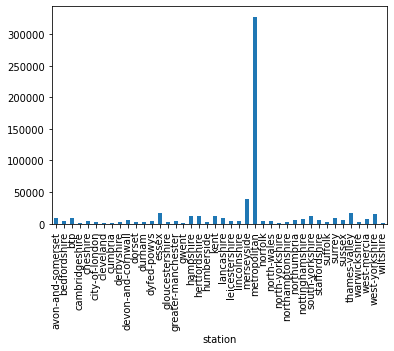

In [7]:
Male_station_df["Gender"].plot(kind="bar")

This is the quantity of Males that are stopped on each station, we probably want to turn this into a normalized value, maybe divide by the quantity of people that are stopped overall in each station

<AxesSubplot:xlabel='station'>

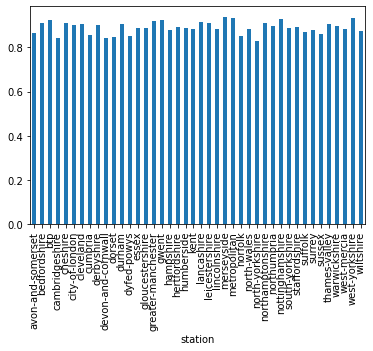

In [8]:
Male_station_df_norm = (Male_station_df["Gender"]/df_gender_count["Gender"])
Male_station_df_norm.plot(kind="bar")

For Males, normalized values seemed very close together all between 0.8 and 1

Let's check on the Females

In [9]:
Female_station_df = df_gender[df_gender["Gender"] == "Female"].groupby("station").count()

<AxesSubplot:xlabel='station'>

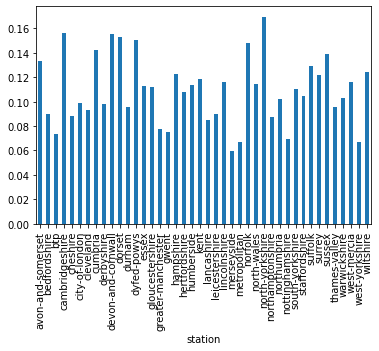

In [10]:
Female_station_df_norm = (Female_station_df["Gender"]/df_gender_count["Gender"])
Female_station_df_norm.plot(kind="bar")

There are a bit more fluctuations around the Female class

Now make a function that loops this and checks if any break this

In [11]:
def verifiy_discrimination(df, sensitive_column="Gender", max_dif=0.1):
    """
        Groups the dataframe by station, calculates the percentage for each sensitive_column and compares the values
    between stations. If any have a geater difference than max_diff then claim there is discrimination
    """
    df_station = df.copy()
    # Get a list of the sensitive classes
    sensitive_classes = df_station[sensitive_column].unique()
    
    # Group the DF by station and keep the total values
    df_total_vals = df_station.groupby("station").count()
    # print(df_total_vals)
    
    problematic_departments = []
    non_problematic_departments = []
    for sens_class in sensitive_classes:
        # print(df_station)
        # group the df and count how many occurrences in the class
        df_grouped = df_station[df_station[sensitive_column] == sens_class].groupby("station").count()
        
        # print(df_grouped)
        # normalise the values
        
        df_normed = (df_grouped[sensitive_column]/df_total_vals[sensitive_column])
        #print(df_normed)

        for station, value in df_normed.items():
            # grab the series onwards
            normed_sliced_df = df_normed.loc[station:]
            
            for station2, value2 in normed_sliced_df.items():
                subt = value - value2
                # print(station, station2)
                if np.abs(subt) > max_dif:
                    # found discrimination
                    problematic_departments.append((sens_class, subt, station, station2))
                else:
                    non_problematic_departments.append((sens_class, subt, station, station2))
        
    
    return (problematic_departments, non_problematic_departments)

In [12]:
problematic_departments, non_problematic_deparments = verifiy_discrimination(df_gender)
print(problematic_departments)

[('Male', 0.10982733946784062, 'merseyside', 'north-yorkshire'), ('Male', 0.10293748532434699, 'metropolitan', 'north-yorkshire'), ('Male', -0.10062704432250724, 'north-yorkshire', 'nottinghamshire'), ('Male', -0.10274697741726202, 'north-yorkshire', 'west-yorkshire'), ('Female', -0.10982733946784058, 'merseyside', 'north-yorkshire'), ('Female', -0.10293748532434692, 'metropolitan', 'north-yorkshire'), ('Female', 0.10062704432250726, 'north-yorkshire', 'nottinghamshire'), ('Female', 0.10274697741726202, 'north-yorkshire', 'west-yorkshire')]


Above we have the results. Which gender is being discriminated and in between what stations. The default value here is if the difference between stations is of more than 10% and we have the same 3 departments that discriminate each gender (which in retrospective makes sense, since there are only 2 classes)

## 1. 2 Analysing as time goes by

Now let's try and add time into factor here. Check if this occurs more specifically in the latest months.

Firstly, let's create some columns with date information so it can be filtered and help the analysis

In [13]:
def create_data_features(df):
    """
    Created data features for each row in the dataframe. Important for the time analysis as well as the modelling
    """
    
    df_base = df.copy()

    # beware american timestamps, where the month comes before day 
    df_base['Date'] = pd.to_datetime(df_base['Date'], format='%Y/%m/%d')

    # get the hour and day of the week, maybe they will be useful 
    df_base['hour'] = df_base['Date'].dt.hour
    df_base['month'] = df_base['Date'].dt.month
    df_base["year"] = df_base["Date"].dt.year
    df_base['day_of_week'] = df_base['Date'].dt.day_name()
    df_base["year-month"] = df_base["Date"].dt.strftime("%Y-%m")
    df_base["year-quarter"] = df_base["Date"].dt.year.astype(str) + 'Q' + df_base["Date"].dt.quarter.astype(str)
    
    return df_base

In [14]:
df_gender = create_data_features(df_gender)
df_gender.head()

,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,...,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,station,hour,month,year,day_of_week,year-month,year-quarter
observation_id,,,,,,,,,,,,,,,,,,,,,
34d76816-cfc2-4bdd-b3a2-bf0c40b12689,Person search,2019-12-01 00:00:00+00:00,True,NaN,NaN,Male,18-24,Asian/Asian British - Any other Asian background,Asian,Misuse of Drugs Act 1971 (section 23),...,A no further action disposal,NaN,False,devon-and-cornwall,0,12,2019,Sunday,2019-12,2019Q4
83c87ec1-e6d4-4bbb-8e0c-159516706359,Person search,2019-12-01 00:09:00+00:00,True,NaN,NaN,Male,18-24,NaN,White,Misuse of Drugs Act 1971 (section 23),...,A no further action disposal,NaN,False,devon-and-cornwall,0,12,2019,Sunday,2019-12,2019Q4
8c2eae4b-035a-492f-92d6-cd27e6c900a1,Person search,2019-12-01 00:10:00+00:00,True,NaN,NaN,Female,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),...,A no further action disposal,NaN,False,devon-and-cornwall,0,12,2019,Sunday,2019-12,2019Q4
e63a036a-a728-4efe-8e08-7198f56d6d0a,Person search,2019-12-01 00:10:00+00:00,False,NaN,NaN,Male,18-24,NaN,Asian,Misuse of Drugs Act 1971 (section 23),...,A no further action disposal,NaN,False,devon-and-cornwall,0,12,2019,Sunday,2019-12,2019Q4
40c70aca-1f7f-4efe-8c5b-ade0f2e9937d,Person search,2019-12-01 00:12:00+00:00,True,50.368247,-4.126646,Male,18-24,NaN,White,Misuse of Drugs Act 1971 (section 23),...,A no further action disposal,NaN,False,devon-and-cornwall,0,12,2019,Sunday,2019-12,2019Q4


In [15]:
df_gender_count = df_gender.groupby(["year-month", "station"]).count()
df_gender_count

Type  Date  Part of a policing operation  \
year-month station                                                       
2017-12    avon-and-somerset   315   315                             0   
           bedfordshire         93    93                             0   
           btp                 129   129                             0   
           cambridgeshire       83    83                             6   
           cheshire            150   150                             4   
...                            ...   ...                           ...   
2019-12    thames-valley       926   926                           926   
           warwickshire        126   126                           126   
           west-mercia         365   365                           365   
           west-yorkshire      974   974                           974   
           wiltshire            62    62                             0   

                              Latitude  Longitude  Gender  Age range  \
year-month station                                                     
2017-12    avon-and-somerset       247        247     315        315   
           bedfordshire              4          4      93         93   
           btp                     124        124     129        129   
           cambridgeshire           83         83      83         83   
           cheshire                134        134     150        150   
...                                ...        ...     ...        ...   
2019-12    thames-valley            72         72     926        926   
           warwickshire            122        122     126        126   
           west-mercia             245        245     365        365   
           west-yorkshire          915        915     974        974   
           wiltshire                62         62      62         62   

                              Self-defined ethnicity  \
year-month station                                     
2017-12    avon-and-somerset                     176   
           bedfordshire                           93   
           btp                                   129   
           cambridgeshire                         80   
           cheshire                              150   
...                                              ...   
2019-12    thames-valley                         826   
           warwickshire                          122   
           west-mercia                           358   
           west-yorkshire                        974   
           wiltshire                              62   

                              Officer-defined ethnicity  Legislation  \
year-month station                                                     
2017-12    avon-and-somerset                        315          312   
           bedfordshire                              93           93   
           btp                                      129          129   
           cambridgeshire                            83           83   
           cheshire                                 150          148   
...                                                 ...          ...   
2019-12    thames-valley                            926           83   
           warwickshire                             126          126   
           west-mercia                              365          365   
           west-yorkshire                           974          974   
           wiltshire                                 62           62   

                              Object of search  Outcome  \
year-month station                                        
2017-12    avon-and-somerset               315      315   
           bedfordshire                     93       93   
           btp                             129      129   
           cambridgeshire                   83       83   
           cheshire                        150      150   
...                                        ...     

In [16]:
# Filter by Gender Male
Male_year_station_df = df_gender[df_gender["Gender"] == "Male"].groupby(["year-month", "station"]).count()

In [17]:
Male_year_station_df_norm = (Male_year_station_df["Gender"]/df_gender_count["Gender"]).reset_index()

# filter by station - for a simple visualisation
Male_year_station_df_norm_ny = Male_year_station_df_norm[Male_year_station_df_norm["station"] == "north-yorkshire"]

Plot a time analysis on the evolution of the rate of stoppings for Male genders

Text(0.5, 1.0, 'Male Stopping Rate in North-Yorkshire')

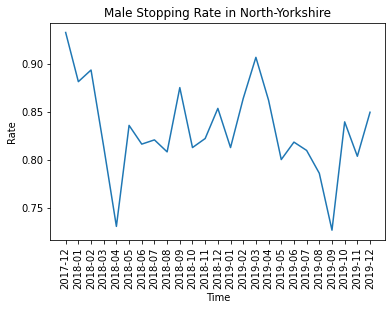

In [18]:
plt.plot(Male_year_station_df_norm_ny["year-month"], Male_year_station_df_norm_ny["Gender"])
plt.xticks(Male_year_station_df_norm_ny["year-month"], rotation='vertical')
plt.ylabel("Rate")
plt.xlabel("Time")
plt.title("Male Stopping Rate in North-Yorkshire")

Text(0.5, 1.0, 'Female Stopping Rate in North-Yorkshire')

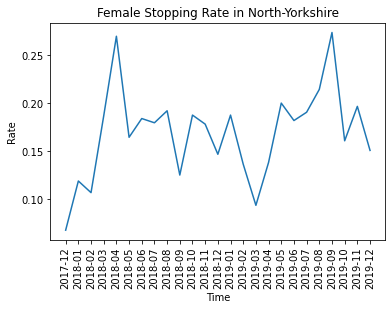

In [19]:
# For females is just 1-Males
plt.plot(Male_year_station_df_norm_ny["year-month"], 1 - Male_year_station_df_norm_ny["Gender"])
plt.xticks(Male_year_station_df_norm_ny["year-month"], rotation='vertical')
plt.ylabel("Rate")
plt.xlabel("Time")
plt.title("Female Stopping Rate in North-Yorkshire")

Out of curiosity I plotted the evolution of the stopping rate, for males and females, in North-Yorkshire. This can be done for every station but since we have 42 stations it's not possible (or useful) to visualise the evolution for all stations at the same time - we want to compare rates between stations and not inside the same station. However this is an interesting visualisation

### Now I will compare, between all "year-month" groups, the rates between stations and if some rates differ more than max_dif, then it will be considered discrimination

In [20]:
def verifiy_discrimination_time(df, date_column ="year-month", sensitive_column="Gender", max_dif=0.10):
    df_copy = df.copy()
    
    # Get the time span of the dataframe
    year_months = df_copy[date_column].unique()
    
    df_grouped = df_copy.groupby([date_column, "station"]).count()
    df_grouped.reset_index(inplace = True)
    
    problematic_departments = []
    # non_problematic_departments = []
    for year_month_pair in year_months:
        # iterate through every month
        df_station_sliced = df_copy[df_copy[date_column] == year_month_pair]

        # check for discrimination in that month
        problematic_departments_monthly, non_problematic_deparments_monthly = verifiy_discrimination(df_station_sliced, sensitive_column, max_dif)
        if len(problematic_departments_monthly) > 0:
            # there are problematic departments
            problematic_departments.append((year_month_pair, problematic_departments_monthly))
    
    return problematic_departments



In [21]:
problematic_departments = verifiy_discrimination_time(df_gender)

In [22]:
problematic_departments

[('2019-12',
  [('Male', -0.1298405466970387, 'avon-and-somerset', 'cambridgeshire'),
   ('Male', -0.11392405063291144, 'bedfordshire', 'cambridgeshire'),
   ('Male', 0.14341085271317833, 'cambridgeshire', 'cheshire'),
   ('Male', 0.13725490196078427, 'cambridgeshire', 'cleveland'),
   ('Male', 0.11864406779661019, 'cambridgeshire', 'devon-and-cornwall'),
   ('Male', 0.13559322033898302, 'cambridgeshire', 'dorset'),
   ('Male', 0.1145374449339207, 'cambridgeshire', 'dyfed-powys'),
   ('Male', 0.11040000000000005, 'cambridgeshire', 'essex'),
   ('Male', 0.10681818181818181, 'cambridgeshire', 'hampshire'),
   ('Male', 0.11839708561020035, 'cambridgeshire', 'hertfordshire'),
   ('Male', 0.13564668769716093, 'cambridgeshire', 'kent'),
   ('Male', 0.16504854368932043, 'cambridgeshire', 'leicestershire'),
   ('Male', 0.1439114391143912, 'cambridgeshire', 'norfolk'),
   ('Male', 0.15068493150684936, 'cambridgeshire', 'north-yorkshire'),
   ('Male', 0.10769230769230764, 'cambridgeshire', 'nort

The output above shows for every month and gender between what stations there has been a difference in relative searches of more tha 10%


### Conclusions

We can see that in more recent months of the dataset, the station **cambridgeshire** is considered to discriminate and oversearch between 22 stations in Males when compared with other stations. 
There are a lot of values every month. Maybe checking this monthy is too extreme? Let's try quarterly since some trainings and reviews are done quarterly it might be a good time window

### Quarterly

In [23]:
problematic_departments = verifiy_discrimination_time(df_gender, "year-quarter")
problematic_departments

[('2019Q4',
  [('Male', 0.11167325428194985, 'btp', 'cambridgeshire'),
   ('Male', 0.10356399265156147, 'btp', 'dorset'),
   ('Male', 0.10204050292734423, 'btp', 'north-yorkshire'),
   ('Male', -0.10284328642069218, 'cambridgeshire', 'lancashire'),
   ('Male', -0.11816289965390214, 'cambridgeshire', 'merseyside'),
   ('Male', -0.1103420811195015, 'cambridgeshire', 'metropolitan'),
   ('Male', -0.11023308320605618, 'cambridgeshire', 'nottinghamshire'),
   ('Male', -0.11988011988011982, 'cambridgeshire', 'west-yorkshire'),
   ('Male', -0.10447852065262175, 'devon-and-cornwall', 'merseyside'),
   ('Male', -0.10619574087883943, 'devon-and-cornwall', 'west-yorkshire'),
   ('Male', -0.11005363802351376, 'dorset', 'merseyside'),
   ('Male', -0.10223281948911311, 'dorset', 'metropolitan'),
   ('Male', -0.1021238215756678, 'dorset', 'nottinghamshire'),
   ('Male', -0.11177085824973143, 'dorset', 'west-yorkshire'),
   ('Male', 0.10340079260207546, 'merseyside', 'norfolk'),
   ('Male', 0.10853014

Above, again, we can see the output of the quarter, gender and the group of stations that infriged the maximum difference allowed of stops.

### Conclusions
If we only consider alarming when a station has a high value when compared with 5 or more stations:
- We can see that in the later quarter, Q4 of 2019, the stations that standout the most are **cambridgeshire, dorset** for stopping more Females than other stations; **merseyside** for stopping more Males and noth-yorkshire seems to have corrected the oversearch towards Females
- In Q3 of 2019, we only have **north-yorkshire** for stopping many more Females than the rest
- In Q2 of 2019, we have **cleveland** again for stopping more Males and **north-yorkshire** for stopping more Females
- In Q1 of 2019, we have **cleveland** for stopping more Males and **sussex** for stopping more Females

So concluding for the year of 2019, the most alarming discriminating stations began with cleveland and sussex, but later on both stations seem to corrected the behaviour when compared with others. However, **north-yorkshire** started until the end of the year. Being, by far, the most alarming station to show discrimination towards **Females**. This was not seen by the last quarter, where cambridgeshire, merseyside and dorset also presented some signs of discrimination.

We can try and plot these rates over time for some of these stations!

In [158]:
def plot_station_over_time(df, stations, date_column='year-quarter', sensitive_col = "Gender", sens_value="Female"):
    df_copy = df.copy()
    
    for station in stations:
            
        # Count the values
        year_station_df = df_copy[df_copy[sensitive_col] == sens_value].groupby([date_column, "station"]).count()
        df_count = df_copy.groupby([date_column, "station"]).count()


        year_station_df_norm = (year_station_df[sensitive_col]/df_count[sensitive_col]).reset_index()

        # filter by station - for a simple visualisation
        year_station_df_norm_ny = year_station_df_norm[year_station_df_norm["station"] == station]

        # Plot
        plt.plot(year_station_df_norm_ny[date_column], year_station_df_norm_ny[sensitive_col], label=station)

    plt.xticks(year_station_df_norm_ny[date_column], rotation='vertical')
    plt.ylabel("Rate")
    plt.xlabel("Time")
    plt.title("{} Stopping Rate".format(sens_value))
    plt.legend(loc="best", fontsize='x-small', bbox_to_anchor=(1.20,1))
    return
    

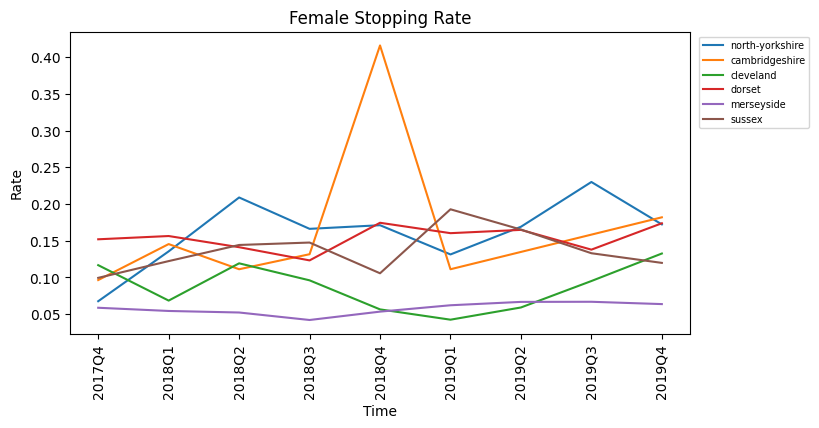

In [159]:
plot_station_over_time(df_gender, ["north-yorkshire", "cambridgeshire", "cleveland", "dorset", "merseyside", "sussex"])

There was a peak in the late 2018s in cambridgeshire, which seemed to have been corrected in 2019 but at the end of the year it seems to be going up again, maybe work keeping tabs on it. The same happened with north-yorkshire in the middle of 2019

Cleveland also seems to have very low numbers in Females in early 2019s (showing discrimination towards Men), but appears to have corrected that towards the year. Merseyside, however, shows very low rates when searching Women, maybe indicating some discrimination towards Men

## 1.2 Clothes Removal

I want to check for all people that were stopped, how many (in relative terms) were asked to remove their clothes. Of the people that were asked to removed clothes, how many of those are females and how many are males. This percentage should be almost even for each station

Clothes removal is not valid for a vehicle search, remove that type and the other NaNs may be filled with False

In [26]:
df_gender_clothes = df_gender.loc[~(df_gender["Type"] == "Vehicle search")]

In [27]:
df_gender_clothes["Removal of more than just outer clothing"].isna().sum()

425473

In [29]:
df_gender_clothes["Removal of more than just outer clothing"] = df_gender_clothes["Removal of more than just outer clothing"].fillna(False)

<ipython-input-29-6e195fb8c17f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender_clothes["Removal of more than just outer clothing"] = df_gender_clothes["Removal of more than just outer clothing"].fillna(False)


In [30]:
df_gender_clothes

,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,...,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,station,hour,month,year,day_of_week,year-month,year-quarter
observation_id,,,,,,,,,,,,,,,,,,,,,
34d76816-cfc2-4bdd-b3a2-bf0c40b12689,Person search,2019-12-01 00:00:00+00:00,True,NaN,NaN,Male,18-24,Asian/Asian British - Any other Asian background,Asian,Misuse of Drugs Act 1971 (section 23),...,A no further action disposal,NaN,False,devon-and-cornwall,0,12,2019,Sunday,2019-12,2019Q4
83c87ec1-e6d4-4bbb-8e0c-159516706359,Person search,2019-12-01 00:09:00+00:00,True,NaN,NaN,Male,18-24,NaN,White,Misuse of Drugs Act 1971 (section 23),...,A no further action disposal,NaN,False,devon-and-cornwall,0,12,2019,Sunday,2019-12,2019Q4
8c2eae4b-035a-492f-92d6-cd27e6c900a1,Person search,2019-12-01 00:10:00+00:00,True,NaN,NaN,Female,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),...,A no further action disposal,NaN,False,devon-and-cornwall,0,12,2019,Sunday,2019-12,2019Q4
e63a036a-a728-4efe-8e08-7198f56d6d0a,Person search,2019-12-01 00:10:00+00:00,False,NaN,NaN,Male,18-24,NaN,Asian,Misuse of Drugs Act 1971 (section 23),...,A no further action disposal,NaN,False,devon-and-cornwall,0,12,2019,Sunday,2019-12,2019Q4
40c70aca-1f7f-4efe-8c5b-ade0f2e9937d,Person search,2019-12-01 00:12:00+00:00,True,50.368247,-4.126646,Male,18-24,NaN,White,Misuse of Drugs Act 1971 (section 23),...,A no further action disposal,NaN,False,devon-and-cornwall,0,12,2019,Sunday,2019-12,2019Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a23dc59d-29fe-48e5-b012-81feb6acfddf,Person search,2018-08-29 02:45:00+00:00,NaN,NaN,NaN,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),...,A no further action disposal,NaN,False,wiltshire,2,8,2018,Wednesday,2018-08,2018Q3
425fde18-f7d5-4ebe-baf4-714cadd5a445,Person and Vehicle search,2018-08-29 21:00:00+00:00,False,51.540219,-1.764708,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),...,Penalty Notice for Disorder,True,False,wiltshire,21,8,2018,Wednesday,2018-08,2018Q3
7c249ab7-d4bf-47ef-86bd-aad51d7d2aab,Person search,2018-08-29 21:10:00+00:00,False,51.540219,-1.764708,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),...,A no further action disposal,NaN,False,wiltshire,21,8,2018,Wednesday,2018-08,2018Q3


In [31]:
df_gender_clothes["Removal of more than just outer clothing"].isna().sum()

0

In [32]:
df_gender_clothes.groupby(["station", "Gender", "Removal of more than just outer clothing"]).count()

Type  Date  \
station           Gender Removal of more than just outer clothing               
avon-and-somerset Female False                                     1239  1239   
                         True                                        97    97   
                  Male   False                                     8145  8145   
                         True                                       534   534   
bedfordshire      Female False                                      369   369   
...                                                                 ...   ...   
west-yorkshire    Male   True                                       280   280   
wiltshire         Female False                                      156   156   
                         True                                        12    12   
                  Male   False                                     1123  1123   
                         True                                        58    58   

                                                                   Part of a policing operation  \
station           Gender Removal of more than just outer clothing                                 
avon-and-somerset Female False                                                                0   
                         True                                                                 0   
                  Male   False                                                                0   
                         True                                                                 0   
bedfordshire      Female False                                                              232   
...                                                                                         ...   
west-yorkshire    Male   True                                                               280   
wiltshire         Female False                                                               72   
                         True                                                                10   
                  Male   False                                                              589   
                         True                                                                42   

                                                                   Latitude  \
station           Gender Removal of more than just outer clothing             
avon-and-somerset Female False                                         1001   
                         True                                            84   
                  Male   False                                         6303   
                         True                                           439   
bedfordshire      Female False                                          174   
...                                                                     ...   
west-yorkshire    Male   True                                           224   
wiltshire         Female False                                          127   
                         True                                            12   
                  Male   False                                          944   
                         True                                            58   

                                                                   Longitude  \
station           Gender Removal of more than just outer clothing              
avon-and-somerset Female False                                          1001   
                         True                                             84   
                  Male   False                                          6303   
                         True                                            439   
bedfordshire      Female False                                           174   
...                                                                      ...   
west-yorkshire    Male   True                            

In [33]:
df_gender_clothes.groupby(["year-quarter", "station", "Gender", "Removal of more than just outer clothing"]).count()

Type  \
year-quarter station           Gender Removal of more than just outer clothing         
2017Q4       avon-and-somerset Female False                                       36   
                                      True                                         2   
                               Male   False                                      256   
                                      True                                        21   
             bedfordshire      Female False                                       11   
...                                                                              ...   
2019Q4       west-yorkshire    Male   False                                     2776   
                                      True                                        41   
             wiltshire         Female False                                       35   
                               Male   False                                      199   
                                      True                                         5   

                                                                                Date  \
year-quarter station           Gender Removal of more than just outer clothing         
2017Q4       avon-and-somerset Female False                                       36   
                                      True                                         2   
                               Male   False                                      256   
                                      True                                        21   
             bedfordshire      Female False                                       11   
...                                                                              ...   
2019Q4       west-yorkshire    Male   False                                     2776   
                                      True                                        41   
             wiltshire         Female False                                       35   
                               Male   False                                      199   
                                      True                                         5   

                                                                                Part of a policing operation  \
year-quarter station           Gender Removal of more than just outer clothing                                 
2017Q4       avon-and-somerset Female False                                                                0   
                                      True                                                                 0   
                               Male   False                                                                0   
                                      True                                                                 0   
             bedfordshire      Female False                                                                0   
...                                                                                                      ...   
2019Q4       west-yorkshire    Male   False                                                             2776   
                                      True                                                                41   
             wiltshire         Female False                                                                0   
                               Male   False                                                                0   
                                      True                                                                 0   

                                                                                Latitude  \
year-quarter station           Gender Removal of more than just outer clothing             
2017Q4       avon-and-somerset Female False                                           29   
                                      True               

In [34]:
def verifiy_disc_clothes_rem_over_time(df, sens_class="Gender", date_col="year-quarter", max_dif = 0.10):
    df_grouped = df.copy()
    
    time_values = df_grouped[date_col].unique()
    stations = df_grouped["station"].unique()
    sens_class_vals = df_grouped[sens_class].unique()
    
    # Group the DF
    df_grouped = df_grouped.groupby([date_col, "station", sens_class, "Removal of more than just outer clothing"]).count()
    df_grouped.reset_index(inplace=True)
    
    problematic_departments = []
    non_problematic_departments = []
    for time in time_values:
        df_grouped_time = df_grouped[df_grouped[date_col] == time]
        
        for station in stations:
            df_grouped_station = df_grouped_time[df_grouped_time["station"] == station]
            ratios = []
            
            for classval in sens_class_vals:
                df_grouped_sens = df_grouped_station[df_grouped_station[sens_class] == classval]
               
                nb_removed = df_grouped_sens[df_grouped_sens["Removal of more than just outer clothing"] == True].Outcome.values[0] if len(df_grouped_sens[df_grouped_sens["Removal of more than just outer clothing"] == True].Outcome.values) > 0 else 0
                nb_not_removed = df_grouped_sens[df_grouped_sens["Removal of more than just outer clothing"] == False].Outcome.values[0] if len(df_grouped_sens[df_grouped_sens["Removal of more than just outer clothing"] == False].Outcome.values) > 0 else 0
                
                if (nb_removed+nb_not_removed) == 0:
                    continue
                
                ratios.append(nb_removed/(nb_removed + nb_not_removed))
    
            for idx, ratio in enumerate(ratios):
                temp = ratios[idx:]
                
                for rest in temp:
                    
                    subt = ratio - rest
                    #print(subt)
                    if np.abs(subt) > max_dif:
                        problematic_departments.append((time, station, sens_class, ratio, rest, subt))
                    else:
                        non_problematic_departments.append((time, station, sens_class, ratio, rest, subt))
    
    return (problematic_departments, non_problematic_departments)

In [35]:
problematic_departments, _ = verifiy_disc_clothes_rem_over_time(df_gender_clothes)

In [36]:
problematic_departments

[('2019Q4',
  'warwickshire',
  'Gender',
  0.05787781350482315,
  0.20512820512820512,
  -0.14725039162338197),
 ('2019Q4',
  'cumbria',
  'Gender',
  0.04946996466431095,
  0.21428571428571427,
  -0.16481574962140333),
 ('2018Q3',
  'north-wales',
  'Gender',
  0.048327137546468404,
  0.17391304347826086,
  -0.12558590593179247),
 ('2018Q3',
  'gloucestershire',
  'Gender',
  0.023696682464454975,
  0.13636363636363635,
  -0.11266695389918138),
 ('2018Q2',
  'cheshire',
  'Gender',
  0.06405693950177936,
  0.22727272727272727,
  -0.16321578777094792),
 ('2018Q2',
  'wiltshire',
  'Gender',
  0.039603960396039604,
  0.16666666666666666,
  -0.12706270627062705),
 ('2018Q2',
  'cumbria',
  'Gender',
  0.03225806451612903,
  0.16326530612244897,
  -0.13100724160631994),
 ('2018Q4',
  'durham',
  'Gender',
  0.025906735751295335,
  0.17647058823529413,
  -0.15056385248399878),
 ('2018Q4',
  'cumbria',
  'Gender',
  0.04680851063829787,
  0.18421052631578946,
  -0.1374020156774916),
 ('201

Well by the output above we can actually see what stations, in what quarter, had a higher difference than 10% when it comes to clothes removal

## Conclusions
- In 2019Q4, we have **warwickshire** and **cumbria**
- In 2019Q1, we jave **northumbria**
- In 2018Q4, we have **durham** and **cumbria**

Only cumbria may be the station appearing more often when compared to others. We can plot it's evolution and check

In [162]:
def plot_remove_station_over_time(df, stations, date_column='year-quarter', sensitive_col = "Gender", sens_value="Female"):
    df_copy = df.copy()
    
    df_copy = df_copy[df_copy["Removal of more than just outer clothing"]]
    
    for station in stations:

        # Count the values
        year_station_df = df_copy[df_copy[sensitive_col] == sens_value].groupby([date_column, "station"]).count()
        df_count = df_copy.groupby([date_column, "station"]).count()


        year_station_df_norm = (year_station_df[sensitive_col]/df_count[sensitive_col]).reset_index()

        # filter by station - for a simple visualisation
        year_station_df_norm_ny = year_station_df_norm[year_station_df_norm["station"] == station]

        # Plot
        plt.plot(year_station_df_norm_ny[date_column], year_station_df_norm_ny[sensitive_col], label=station)
    
    plt.xticks(year_station_df_norm_ny[date_column], rotation='vertical')
    plt.ylabel("Rate")
    plt.xlabel("Time")
    plt.title("{} Clothing Removal".format(sens_value))
    plt.legend(loc="best", fontsize='x-small', bbox_to_anchor=(1.20,1))
    return

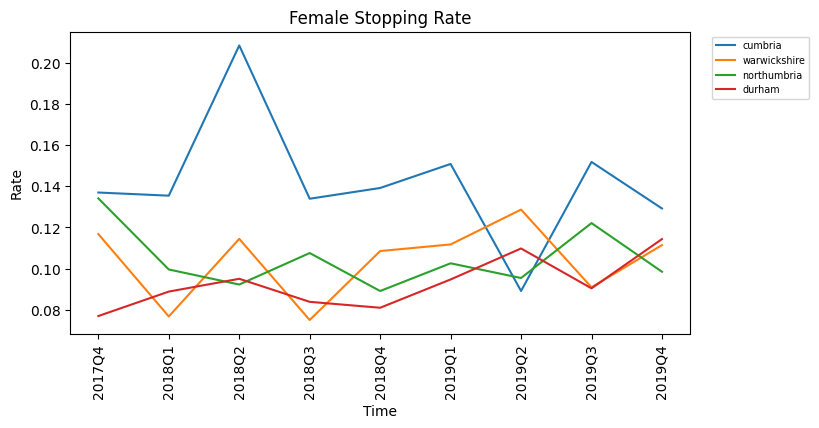

In [163]:
plot_station_over_time(df_gender_clothes, ["cumbria", "warwickshire", "northumbria", "durham"])

As it's possible to see from above, **Cumbria**'s rate is very bumpy, full of ups and downs between quarters, always going down on average as time progresses, however ending on a high spike, so some precaution with this station is advised. **Warwickshire** was always relatively low, starting to come up in the later quarters. There is very few information on **Durham** ending however in a very high rate, checking up on this is advised

I think that is it for the Gender analysis! Let's go now to age!

# 2. Age

In the EDA notebook it was showed that there are no missing values in the Age range column. There seems to, however, exist a small percentage of ranges that are "under 10" which is weird and should be reported. For the discrimination analysis these will be dropped

In [41]:
df["Age range"].unique()

array(['18-24', '25-34', 'over 34', '10-17', 'under 10'], dtype=object)

In [46]:
df["Age range"].value_counts(normalize=True)

18-24       0.366184
25-34       0.239447
10-17       0.199456
over 34     0.194332
under 10    0.000581
Name: Age range, dtype: float64

In [103]:
df_age = df[df["Age range"] != "under 10"]

In [104]:
def plot_station_class(df, plot_class="Age range"):
    
    df_copy = df.copy()
    class_values = df_copy[plot_class].unique()
    df_count = df_copy.groupby("station").count()
    
    for idx, class_ in enumerate(class_values):
        group_station = df_copy[df_copy[plot_class] == class_].groupby("station").count()
        group_station_normed = (group_station[plot_class]/df_count[plot_class])
        
        group_station_normed.plot(kind="bar")
        plt.ylabel("Rate")
        plt.xlabel("Stations")
        plt.title("Stopping rate for {}-{}".format(plot_class, class_))
        plt.show()
    
    return

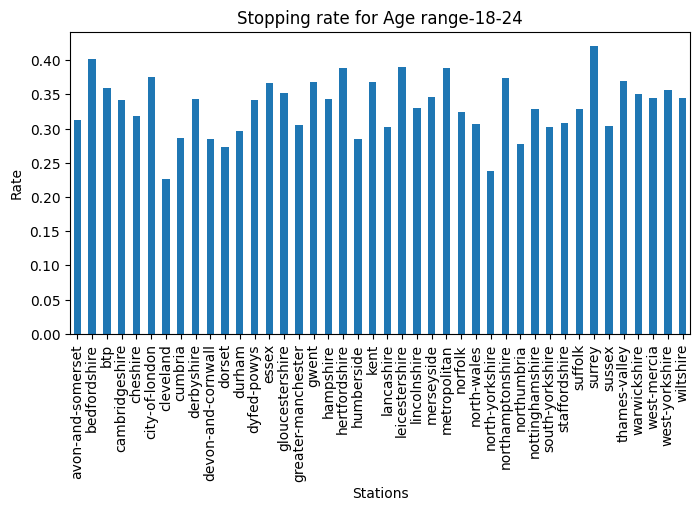

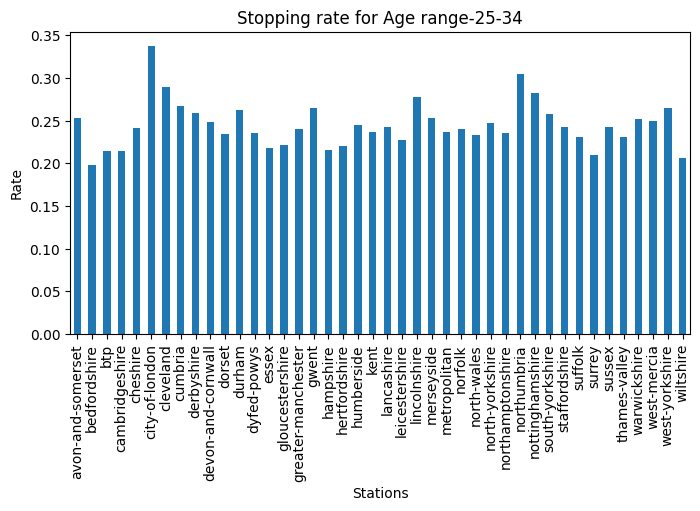

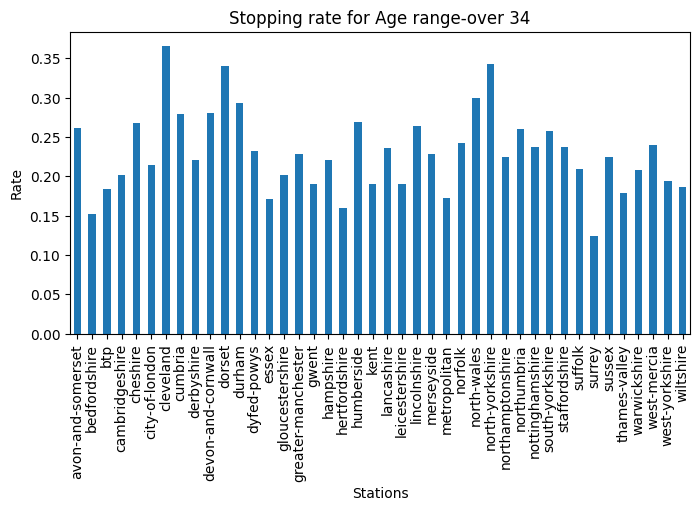

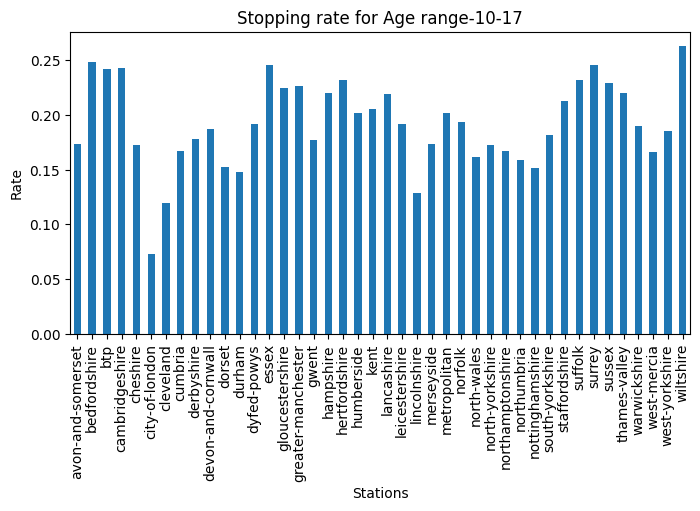

In [164]:
plot_station_class(df_age)

By analysing the plots it seems that the rates are more stable when considering middle age ranges. Being the highest differences in higher than 34 years old and below 17

In [108]:
problematic_deps, non_problematic_deps = verifiy_discrimination(df_age, sensitive_column="Age range", max_dif=0.15)

In [109]:
problematic_deps

[('18-24', 0.17474177945382133, 'bedfordshire', 'cleveland'),
 ('18-24', 0.16378230881693134, 'bedfordshire', 'north-yorkshire'),
 ('18-24', -0.16191355208696248, 'cleveland', 'hertfordshire'),
 ('18-24', -0.16374327732030083, 'cleveland', 'leicestershire'),
 ('18-24', -0.16220445885448861, 'cleveland', 'metropolitan'),
 ('18-24', -0.19373596191073159, 'cleveland', 'surrey'),
 ('18-24', 0.1509540814500725, 'hertfordshire', 'north-yorkshire'),
 ('18-24', 0.15278380668341085, 'leicestershire', 'north-yorkshire'),
 ('18-24', 0.15124498821759863, 'metropolitan', 'north-yorkshire'),
 ('18-24', -0.1827764912738416, 'north-yorkshire', 'surrey'),
 ('over 34', -0.21283820891150732, 'bedfordshire', 'cleveland'),
 ('over 34', -0.18727660237644947, 'bedfordshire', 'dorset'),
 ('over 34', -0.1901955290107629, 'bedfordshire', 'north-yorkshire'),
 ('over 34', -0.18091452094600047, 'btp', 'cleveland'),
 ('over 34', -0.15535291441094262, 'btp', 'dorset'),
 ('over 34', -0.15827184104525605, 'btp', 'nort

## 2.1 Time analysis

In [111]:
df_age = create_data_features(df_age)
df_age.head()

,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,...,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,station,hour,month,year,day_of_week,year-month,year-quarter
observation_id,,,,,,,,,,,,,,,,,,,,,
34d76816-cfc2-4bdd-b3a2-bf0c40b12689,Person search,2019-12-01 00:00:00+00:00,True,NaN,NaN,Male,18-24,Asian/Asian British - Any other Asian background,Asian,Misuse of Drugs Act 1971 (section 23),...,A no further action disposal,NaN,False,devon-and-cornwall,0,12,2019,Sunday,2019-12,2019Q4
83c87ec1-e6d4-4bbb-8e0c-159516706359,Person search,2019-12-01 00:09:00+00:00,True,NaN,NaN,Male,18-24,NaN,White,Misuse of Drugs Act 1971 (section 23),...,A no further action disposal,NaN,False,devon-and-cornwall,0,12,2019,Sunday,2019-12,2019Q4
8c2eae4b-035a-492f-92d6-cd27e6c900a1,Person search,2019-12-01 00:10:00+00:00,True,NaN,NaN,Female,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),...,A no further action disposal,NaN,False,devon-and-cornwall,0,12,2019,Sunday,2019-12,2019Q4
e63a036a-a728-4efe-8e08-7198f56d6d0a,Person search,2019-12-01 00:10:00+00:00,False,NaN,NaN,Male,18-24,NaN,Asian,Misuse of Drugs Act 1971 (section 23),...,A no further action disposal,NaN,False,devon-and-cornwall,0,12,2019,Sunday,2019-12,2019Q4
40c70aca-1f7f-4efe-8c5b-ade0f2e9937d,Person search,2019-12-01 00:12:00+00:00,True,50.368247,-4.126646,Male,18-24,NaN,White,Misuse of Drugs Act 1971 (section 23),...,A no further action disposal,NaN,False,devon-and-cornwall,0,12,2019,Sunday,2019-12,2019Q4


In [115]:
problematic_stations = verifiy_discrimination_time(df_age, date_column ="year-quarter", sensitive_column="Age range", max_dif=0.15)


In [116]:
problematic_stations

[('2019Q4',
  [('18-24', -0.1593627073079128, 'avon-and-somerset', 'leicestershire'),
   ('18-24', 0.18746843662073442, 'bedfordshire', 'cleveland'),
   ('18-24', 0.15958224396277867, 'bedfordshire', 'dorset'),
   ('18-24', 0.17093719537668847, 'bedfordshire', 'north-yorkshire'),
   ('18-24', 0.18263473053892215, 'bedfordshire', 'sussex'),
   ('18-24', 0.1790237874575224, 'btp', 'cleveland'),
   ('18-24', 0.15113759479956665, 'btp', 'dorset'),
   ('18-24', 0.16249254621347645, 'btp', 'north-yorkshire'),
   ('18-24', 0.17419008137571013, 'btp', 'sussex'),
   ('18-24', 0.17086527929901424, 'cambridgeshire', 'cleveland'),
   ('18-24', 0.1543340380549683, 'cambridgeshire', 'north-yorkshire'),
   ('18-24', 0.16603157321720197, 'cambridgeshire', 'sussex'),
   ('18-24', -0.15079640111406312, 'cheshire', 'leicestershire'),
   ('18-24', 0.1732019878780729, 'city-of-london', 'cleveland'),
   ('18-24', 0.15667074663402694, 'city-of-london', 'north-yorkshire'),
   ('18-24', 0.16836828179626062, 'c

#### Notes of the stdout
- In 2019Q4 in the age-range of 18-24 we have **cleveland** and **north-yorkshire** not stopping this age range enough when compared to almost all the other stations, **leicestershire** stop more when compared to other stations; Over 34, **cleveland** with a stopping rate much higher when compared to other stations, as well as **dorset** **north-yorkshire**, **leiscestershire** less. in 10-17 **city-of-london** less.

- In 2019Q3 age range over 34 **cleveland** with high rates, **dorset** and **north-yorkshire** very high; 10-17 **city-of-london** low, 18-24 **dorset**, **north-yorkshire** low; 25-34 **city-of-london** high

- In 2019Q2 18-24 **sussex**, **north-yorkshire** low, over 34 **bedfordshire** low, **cleveland** and **north-yorkshire** really high; in 10-17 **city-of-london** low

- In 2019Q1 18-24 **cleveland** low value of search; 10-17 **city-of-london** low values, **wiltshire** high value; over 34 **cleveland** and **dorset** **north-yorkshire** with very high values



## Conclusions

Looking at the results here and the most problematic discriminations between the age ranges throughout the quarters that we can draw are:

- Analysing the stopping rate for each age range over the quarters of 2019, we can see that **Cleveland**, **North Yorkshire** and **Dorset** show high search rates for people over 34 years old, discriminating the age range of 18-24;
- **City of London** and **Bedfordshire** station seems to search more the range of ages between 25-34 and search less the age range of between 10-17 years old;


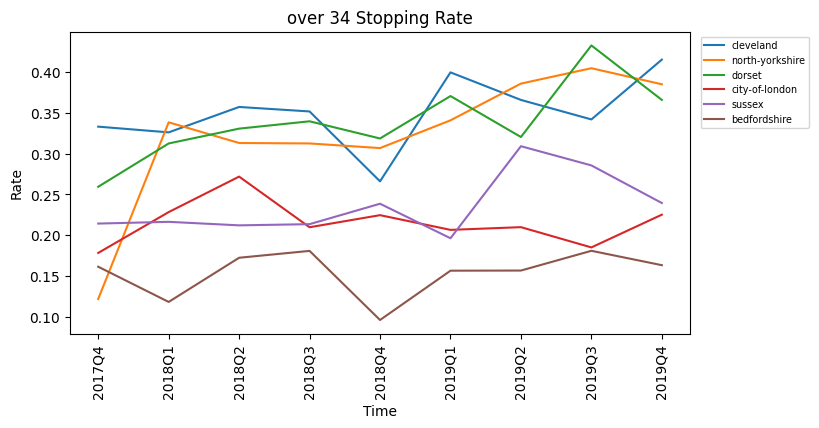

In [165]:
plot_station_over_time(df_age, ["cleveland", "north-yorkshire", "dorset", "city-of-london", "sussex", "bedfordshire"], sensitive_col = "Age range", sens_value="over 34")


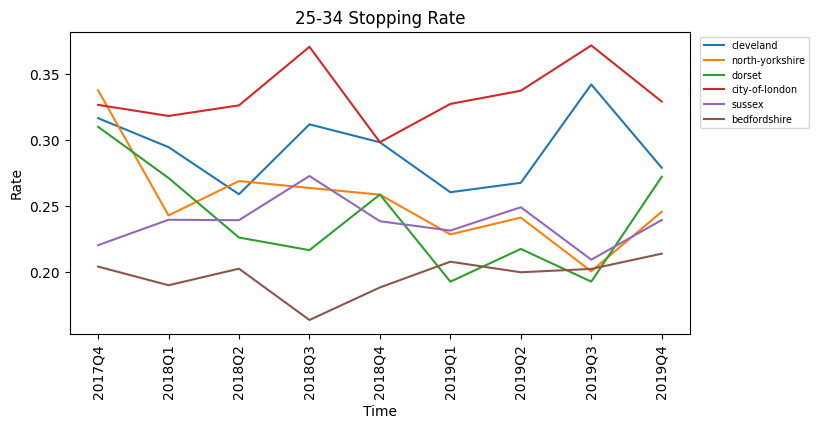

In [172]:
plot_station_over_time(df_age, ["cleveland", "north-yorkshire", "dorset", "city-of-london", "sussex", "bedfordshire"], sensitive_col = "Age range", sens_value="25-34")


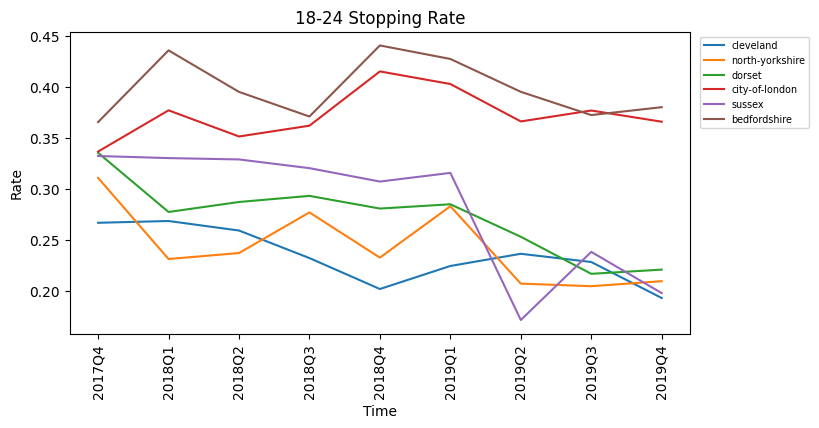

In [174]:
plot_station_over_time(df_age, ["cleveland", "north-yorkshire", "dorset", "city-of-london", "sussex", "bedfordshire"], sensitive_col = "Age range", sens_value="18-24")
